## Analyze A/B Test Results
### by Alessio Cozzi



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

The task for this project is to run an A/B test by an e-commerce website.  

The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. 

The goal is to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

Les't get started by importing the required libraries.

In [53]:
# importing the required libraries

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [54]:
# Loading the data into a Dataframe
df = pd.read_csv('ab_data.csv')

#First 5 observations
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [55]:
print('Number of rows in the dataset: ' + str(df.shape[0]))

Number of rows in the dataset: 294478


c. The number of unique users in the dataset.

In [56]:
print('Number of unique users in the dataset: ' + str(df.user_id.nunique()))

Number of unique users in the dataset: 290584


d. The proportion of users converted.

In [57]:
print('Proportion of users converted: {0:.2%}'.format(df.converted.mean()))

Proportion of users converted: 11.97%


e. The number of times the new_page and treatment don't line up.

In [58]:
#Selecting observation where new_page and treatment don't line up
diff1 = df.query('group == "treatment" and landing_page != "new_page"')
diff2 = df.query('group != "treatment" and landing_page == "new_page"')

# Concatenating two prior list into one
diff = pd.concat([diff1, diff2])

print('Number of times the new_page and treatment dont line up: ' + str(len(diff)))

Number of times the new_page and treatment dont line up: 3893


f. Do any of the rows have missing values?

In [59]:
# Count missing values
print('There are no missing values in the dataset \n')
print(str(df.isnull().sum()))

There are no missing values in the dataset 

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [61]:
# Dropping observations where new page and treatment don't line up
df2 = df.drop(diff.index)

In [62]:
#Checking drop of observations where new page and treatment don't line up
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [63]:
print('Number of unique users in df2: ' + str(df2['user_id'].nunique()))

Number of unique users in df2: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [64]:
print('User_ID repeted in the dataset:' + str(int(df2[df2.duplicated(['user_id'])]['user_id'].values)))

User_ID repeted in the dataset:773192


c. What is the row information for the repeat **user_id**? 

In [65]:
print('Below observations with the same User_ID (773192) \n')
print(df2[df2['user_id'] == 773192])
print('\n The only difference between the two observation is the timestamp')

Below observations with the same User_ID (773192) 

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

 The only difference between the two observation is the timestamp


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [66]:
# Dropping observation with less recent timestamp (index 1899)
df2 = df2.drop(1899)
print('After dropping index 1899, we have only one istance of User_ID 773192: \n')
print(df2[df2['user_id'] == 773192])

After dropping index 1899, we have only one istance of User_ID 773192: 

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [67]:
print("Probability of conversion: {0:.2%}".format(df2.converted.mean()))

Probability of conversion: 11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [68]:
print("Probability of conversion in control group: {0:.2%}".format(df2[df2['group'] == "control"]['converted'].mean()))

Probability of conversion in control group: 12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [69]:
print("Probability of conversion in treatment group: {0:.2%}".format(df2[df2['group'] == "treatment"]['converted'].mean()))

Probability of conversion in treatment group: 11.88%


d. What is the probability that an individual received the new page?

In [70]:
p_newpage = df2[df2['landing_page'] == "new_page"]['converted'].count()/df2.shape[0]

print("Probability of receiveing new page: {0:.2%}".format(p_newpage))

Probability of receiveing new page: 50.01%


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

Based on the above calculations, we can see what is the conversion rate probaility for both control group and treatment group. It seams that the conversion rate for the control group (12.04%) is better compare to the treatment group (11.88%). At this stage however, we don't have all the information needed to make a concreate statement about the old versus new page in the website analyzed.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$ : $p_{new}$ - $p_{old}$ <= 0

$H_{1}$ : $p_{new}$ - $p_{old}$ > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [71]:
p_new = df2.converted.mean()
p_new

print('p_new : {0:.2%}'.format(p_new))

p_new : 11.96%


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [72]:
p_old = df2.converted.mean()
p_old

print('p_old : {0:.2%}'.format(p_old))

p_old : 11.96%


c. What is $n_{new}$?

In [73]:
n_new = df2[df2['group'] == 'treatment']['user_id'].count()
n_new

print('n_new : {}'.format(n_new))

n_new : 145310


d. What is $n_{old}$?

In [74]:
n_old = df2[df2['group'] == 'control']['user_id'].count()
n_old

print('n_old : {}'.format(n_old))

n_old : 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [75]:
#performing random choice [0,1] with p_new
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [76]:
#performing random choice [0,1] with p_old
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [77]:
#calculating difference between simulation random choice p_new vs p_old
diff_test = new_page_converted.mean() - old_page_converted.mean()
print('Difference between test p_new vs test p_old: {0:.2%}'.format(diff_test))

Difference between test p_new vs test p_old: -0.05%


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [78]:
# simulating 10,000 p_new - p_old
p_diffs = []

for _ in range(10000):
    new_page_converted_mean = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted_mean = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff_mean = new_page_converted_mean - old_page_converted_mean 
    p_diffs.append(diff_mean)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [79]:
#Proportion of conversion difference p_new and p_old of the ad_data.csv
original_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
original_diff

-0.0015782389853555567

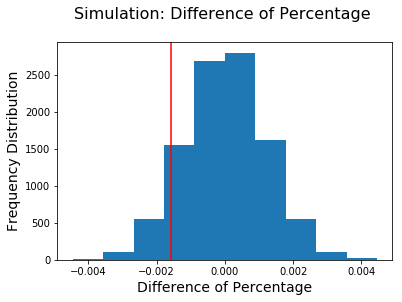

In [80]:
#Plotting simulation 10,000 p_new - p_old
plt.hist(p_diffs)

#Required titles and labels for the plot
plt.xlabel('Difference of Percentage', fontsize=14)
plt.ylabel('Frequency Distribution', fontsize=14)
plt.title('Simulation: Difference of Percentage \n', fontsize=16);

# plotting line rapresenting ab_data difference p_new and p_old
plt.axvline(original_diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [81]:
# proportion of p_diffs greater than original difference in ab_data
(original_diff < p_diffs).mean()

0.90990000000000004

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Regarding step j, we have calculated the percentage of p_diffs that are greather compared to the original difference in proportion based on ab_data.csv.

In statistical hypothesis testing, the p-value or probability value is the probability for a given statistical model that, when the null hypothesis is true, the statistical summary would be greater than or equal to the actual observed results.

From step j and above calculations, we can see that there is no conversion benefit by using the new page in the website. We can then state that the null hypothesis is true since the two type of pages have almost close outcome. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [82]:
#importing statsmodels library
import statsmodels.api as sm

# Counting converted users per type of group
convert_old = df2[df2['group'] == "control"]['converted'].sum()
convert_new = df2[df2['group'] == "treatment"]['converted'].sum()

# Counting users per type of group
n_old = df2[df2['group'] == 'control']['user_id'].count()
n_new = df2[df2['group'] == 'treatment']['user_id'].count()


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [83]:
# calculating test statistic and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

print('z_score: ' + str(z_score))
print('p_value: ' + str(p_value))

z_score: 1.31092419842
p_value: 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The Z score is a test of statistical significance that helps us to  decide whether or not to reject the null hypothesis. 

The p-value is the probability that you have falsely rejected the null hypothesis.

We can clearly see that the outcome from step j and k are almost identical. From step j and k, we can see that there is no conversion benefit by using the new page in the website. We can then state that the null hypothesis is true since the two type of pages have almost close outcome.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [84]:
# creating intercept column for regression
df2['intercept']=1

# creating dummy variables for regression
df2[['control_group', 'ab_page']] = pd.get_dummies(df2['group'])
df2[['old_page', 'new_page']] = pd.get_dummies(df2['landing_page'])

# testing if changes have been applied
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control_group,ab_page,old_page,new_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [85]:
# logistic regression model
logit_function = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [86]:
#fitting model and outline summary
outcome = logit_function.fit()
outcome.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        22:48:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

p_value= 0.190

$H_{0}$ : $p_{new}$ - $p_{old}$ = 0

$H_{1}$ : $p_{new}$ - $p_{old}$ != 0

The main differnce between logistic regression and part 2 is that the logistic regression is two-sided test, where the part 2 is one-side test 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Other factors are critical for our analysis.

By adding new factors, we can have a better understanding and predict accurately the actual outcome.

Factors like demographicssuch as gender, age, income and many more, may be useful for our analysis.

At the same time, we need to be conciuos about how many variables to add in the regression. In this case, we may need to have a look at the correlation of the variables agians the conversion rate and between each other.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [87]:
# Importing data from countries.csv
df_loc = pd.read_csv('countries.csv')

# printing head of data loaded
print(df_loc.head(), "\n")

# printing list of countries in the new loaded data
print(df_loc['country'].value_counts())


   user_id country
0   834778      UK
1   928468      US
2   822059      UK
3   711597      UK
4   710616      UK 

US    203619
UK     72466
CA     14499
Name: country, dtype: int64


In [88]:
# merging df2 with countries data based on "user_id"
df3 = df2.merge(df_loc, left_on='user_id', right_on='user_id')

# creating dummy variables for regression 
df3[['country_CA','country_UK','country_US']] = pd.get_dummies(df3['country'])

print(df3.head())

   user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  control_group  ab_page  old_page  new_page country  country_CA  \
0          1              1        0         0         1      US           0   
1          1              1        0         0         1      US           0   
2          1              0        1         1         0      US           0   
3          1              0        1         1         0      US           0   
4          1              1        0         0         1      US           0   

   country_UK  country_US  
0           0           1  


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [90]:
# logistic regression model
logit_function = sm.Logit(df3['converted'],df3[['intercept','country_US','country_UK']])

# fitting model and print summary
outcome = logit_function.fit()
outcome.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 02 Jan 2019   Pseudo R-squ.:               1.521e-05
Time:                        22:48:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

<a id='conclusions'></a>

## Conclusions

Based on the analysis performed with various methods, the old page has a better performace or similar to the new page proposed for the website.

We can then conclude we fail to reject the Null Hypothesis.









In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0